# IMPORT BASIC TOOLS

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IMPORT DATA, INSPECT

In [5]:
data = pd.read_csv('http://localhost:8888/files/PROJECT%20-%20BBURKART/DATA/diabetes.csv')

In [6]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [163]:
data.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,5,15,25,35,45
weight,0,0,0,0,0
admission_type,6,1,1,1,1
discharge_disposition,NULL,home,home,home,home
admission_source,MD,ED,ED,ED,ED
days_in_hospital,1,3,2,2,1
payor_code,Unknown,Unknown,Unknown,Unknown,Unknown
referring_specialty,Pediatrics-Endocrinology,Unknown,Unknown,Unknown,Unknown


# CONVENTIONALIZE COLUMN NAMES  & DROP PATIENT-SPECIFIC INFO

In [8]:
data.columns = [each.replace(' ','_').lower() for each in data.columns]
data.columns = [each.replace('-','_').lower() for each in data.columns]

data = data.rename(columns = {'admission_type_id' : 'admission_type',
                              'discharge_disposition_id' : 'discharge_disposition',
                              'admission_source_id' : 'admission_source',
                              'time_in_hospital' : 'days_in_hospital',
                              'payer_code' : 'payor_code',
                              'medical_specialty' : 'referring_specialty', 
                              'num_lab_procedures' : 'number_labs',
                              'num_procedures' : 'number_procedures', 
                              'num_medications' : 'number_meds',
                              'number_diagnoses' : 'total_number_diag', 
                              'max_glu_serum' : 'max_blood_glucose',
                              'a1cresult' : 'a1c', 
                              'diabetesmed' : 'on_diabetes_meds',
                              'readmitted' : 'readmission_category'})

data = data.drop('encounter_id', 1)
data = data.drop('patient_nbr', 1)

# DEFINE THE OUTCOME FEATURES

> ## I'M MOST INTERESTED IN WHETHER OR NOT PATIENTS WERE RE-ADMITTED, BUT THE DATA HAS READMISSIONS SEPARATED INTO DAYS FROM DISCHARGE TO READMISSION:
- WITHIN 30 DAYS OF DISCHARGE
- AT LEAST 30 DAYS AFTER DISCHARGE

The original data set includes ::

(101766, 48)
  rows , columns


So, of the total 101766 patients in this data set, there are this many in each readmission category ::

Not readmitted ==  54864 or  53.911915571 % of total.

Readmitted within 30 days ==  11357 patients, or  11.1599158855 % of total.

Readmitted after 30 days ==  35545 patients, or  34.9281685435 % of total.




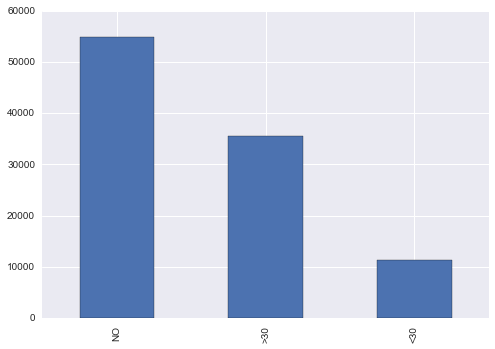

In [9]:
print('The original data set includes ::')
print()
print(data.shape)
print('  rows', ',', 'columns')
print() 
print()
print('So, of the total',
      data.readmission_category.count(),
      'patients in this data set, there are this many in each readmission category ::')
print()
print('Not readmitted == ', 
      data.readmission_category[data.readmission_category == 'NO'].count(),
      'or ',
      data.readmission_category[data.readmission_category == 'NO'].count() / data.readmission_category.count() * 100,
      '% of total.'
)
print()
print('Readmitted within 30 days == ', 
      data.readmission_category[data.readmission_category == '<30'].count(),
      'patients, or ',
      data.readmission_category[data.readmission_category == '<30'].count() / data.readmission_category.count() * 100,
      '% of total.'
)
print()
print('Readmitted after 30 days == ', 
      data.readmission_category[data.readmission_category == '>30'].count(),
      'patients, or ',
      data.readmission_category[data.readmission_category == '>30'].count() / data.readmission_category.count() * 100,
      '% of total.'
)
print()
print()
data.readmission_category.value_counts().plot(kind = 'bar')

In [10]:
to_get_readmitted = {
    'NO' : 0,
    '>30' : 1,
    '<30' : 1} 
data['readmitted'] = data['readmission_category'].apply(lambda x:to_get_readmitted[x])

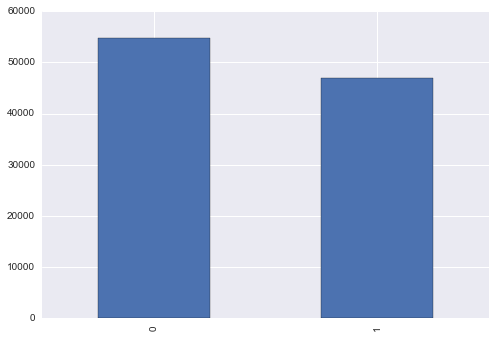

In [11]:
data.readmitted.value_counts().plot(kind = 'bar')

In [12]:
to_get_readmit_time = {
    'NO' : 0,
    '>30' : 1,
    '<30' : 2} 
data['readmit_time'] = data['readmission_category'].apply(lambda x:to_get_readmit_time[x])

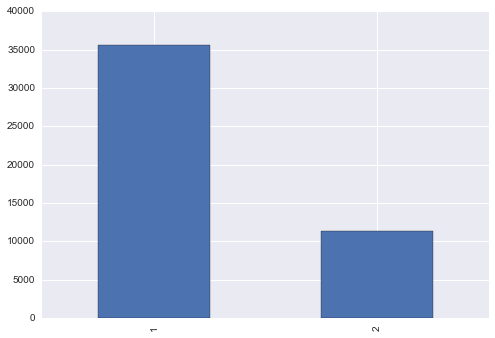

In [14]:
data.readmit_time[data.readmitted == 1].value_counts().plot(kind = 'bar')

# NULL ACCURACY FOR PREDICTING GOAL :: READMITTED OR NOT

In [15]:
print('Percent readmitted at all: ', data.readmitted[data.readmitted == 1].count() / data.readmitted.count() * 100)
print('Percent NOT readmitted: ', data.readmitted[data.readmitted == 0].count() / data.readmitted.count() * 100)

Percent readmitted at all:  46.088084429
Percent NOT readmitted:  53.911915571


> # So my primary goal is to predict whether or not a patient will be readmitted with greater than 46.09% accuracy
#### - Goal # 2 is to identify similarities among patients who are readmitted that are different from similarities among patients who are not readmitted.  Considering Random Forest feature significances and clustering with k-means and DBSCAN to identify these.
#### - Goal # 3 is to offer probabilities of readmission given the the patient has constellations of significant features.  Considering Naive Bayes, KNN, Logistic Regression to offer these.

# BUT FIRST, I HAVE TO CLEAN THE DATA TO MAKE IT ACCESSIBLE TO MACHINE LEARNING TOOLS

> ## RACE was a multi-nomial categorical
- I made dummies

In [19]:
data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [20]:
data.race = [each.replace('?','Unknown') for each in data.race]
data.race = [each.replace('Other','Unknown') for each in data.race]

In [21]:
data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Unknown             3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [23]:
race_dummies = pd.get_dummies(data.race, prefix = 'race')

In [24]:
race_dummies.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Unknown
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


> ## GENDER was a binary categorical (though not really)
- There were some unknowns, so I made those '2'.

In [25]:
data.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [26]:
to_replace_gender = {
    'Female' : 0,
    'Male' : 1,
    'Unknown/Invalid': 2}
data.gender = data.gender.apply(lambda x: to_replace_gender[x])

In [27]:
data.gender.value_counts()

0    54708
1    47055
2        3
Name: gender, dtype: int64

> ## AGE was categorical but could be numeric
- I used the middle of each range to make it numeric

In [39]:
data.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [40]:
to_replace_age = {
    '[0-10)' : 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95}
data['age'] = data['age'].apply(lambda x:to_replace_age[x])

> ## WEIGHT was categorical, but could be numeric
- It also had mostly unknowns.
- It might be useful later, so I set ? to 0 and used the max for each category to make it numerical

In [43]:
data.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [44]:
print('percent of weight that are unknown:  ', data.weight[data.weight == '?'].count()/data.weight.count())
print('percent of weight that are known: ', data.weight[data.weight != '?'].count()/data.weight.count())
print('number of rows where weight is known: ', data.weight[data.weight != '?'].count())

percent of weight that are unknown:   0.968584792563
percent of weight that are known:  0.0314152074367
number of rows where weight is known:  3197


In [45]:
to_replace_weight = {
    '?' : 0,
    '[0-25)' : 25,
    '[25-50)': 50,
    '[50-75)': 75,
    '[75-100)': 100,
    '[100-125)': 125,
    '[125-150)': 150,
    '[150-175)': 175,
    '[175-200)': 200,
    '>200': 225}
data['weight'] = data['weight'].apply(lambda x:to_replace_weight[x])

> ## ADMISSION_TYPE was a coded categorical
- I re-assigned the categories, aggregated them, then made dummies

In [47]:
data.admission_type.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type, dtype: int64

In [48]:
admission_type_dummies = pd.get_dummies(data.admission_type, prefix = 'admission_type')

In [49]:
admission_type_dummies.head()

,admission_type_1,admission_type_2,admission_type_3,admission_type_4,admission_type_5,admission_type_6,admission_type_7,admission_type_8
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> ## DISCHARGE_DISPOSITION was a coded categorical
- I re-assigned the categories, aggregated them, then made dummies

In [50]:
to_replace_discharge_disposition = {
    1 : 'home',
    2 : 'short term hospital',
    3 : 'SNF',
    4 : 'ICF',
    5 : 'inpatient care institution',
    6 : 'home with home health service',
    7 : 'Left AMA',
    8 : 'home under care of home IV provider',
    9 : 'admitted to this hospital',
    10 : 'neonate to another neonate hospital',
    11 : 'expired',
    12 : 'still patient or expected to return for outpatient',
    13 : 'hospice at home',
    14 : 'hospice at medical facility',
    15 : 'this institution for medicare approved swing bed',
    16 : 'another institution for outpatient services',
    17 : 'this institution for outpatient services',
    18 : 'NULL',
    19 : 'expired at home. Medicaid only, hospice',
    20 : 'expired at medical facility. Medicaid only, hospice',
    21 : 'expired at unknown place. Medicaid only, hospice',
    22 : 'rehab facility',
    23 : 'long term care hospital',
    24 : 'SNF under medicaid, but not medicare',
    25 : 'NULL',
    26 : 'another health care facility, undefined',
    27 : 'federal health care facility',
    28 : 'psychiatric hospital',
    29 : 'critical care access hospital'}
data['discharge_disposition'] = data['discharge_disposition'].apply(lambda x:to_replace_discharge_disposition[x])

In [51]:
data.discharge_disposition.value_counts()

home                                                   60234
SNF                                                    13954
home with home health service                          12902
NULL                                                    4680
short term hospital                                     2128
rehab facility                                          1993
expired                                                 1642
inpatient care institution                              1184
ICF                                                      815
Left AMA                                                 623
long term care hospital                                  412
hospice at home                                          399
hospice at medical facility                              372
psychiatric hospital                                     139
home under care of home IV provider                      108
this institution for medicare approved swing bed          63
SNF under medicaid, but 

> > aggregated to discharged_to_location, then made dummies

In [52]:
to_get_discharged_to_location = {
    'home' : 'home',
    'short term hospital' : 'facility',
    'SNF' : 'facility',
    'ICF' : 'facility',
    'inpatient care institution' : 'facility',
    'home with home health service' : 'home',
    'Left AMA' : 'home',
    'home under care of home IV provider' : 'home',
    'admitted to this hospital' : 'facility',
    'neonate to another neonate hospital' : 'facility',
    'expired' : 'NULL',
    'still patient or expected to return for outpatient' : 'facility',
    'hospice at home' : 'home',
    'hospice at medical facility' : 'facility',
    'this institution for medicare approved swing bed' : 'facility',
    'another institution for outpatient services' : 'facility',
    'this institution for outpatient services' : 'facility',
    'NULL' : 'NULL',
    'expired at home. Medicaid only, hospice' : 'home',
    'expired at medical facility. Medicaid only, hospice' : 'facility',
    'expired at unknown place. Medicaid only, hospice' : 'NULL',
    'rehab facility' : 'facility',
    'long term care hospital' : 'facility',
    'SNF under medicaid, but not medicare' : 'facility',
    'another health care facility, undefined' : 'facility',
    'federal health care facility' : 'facility',
    'psychiatric hospital' : 'facility',
    'critical care access hospital' : 'facility'}

data['discharged_to_location'] = data['discharge_disposition'].apply(lambda x:to_get_discharged_to_location[x])

In [53]:
data.discharged_to_location.value_counts()

home        74274
facility    21170
NULL         6322
Name: discharged_to_location, dtype: int64

In [54]:
discharged_to_location_dummies = pd.get_dummies(data.discharged_to_location, prefix = 'discharged_to_location')

In [55]:
discharged_to_location_dummies.head()

,discharged_to_location_NULL,discharged_to_location_facility,discharged_to_location_home
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


>> Tried some extra features based on the aggregated discharge dispositions and made them boolean

In [57]:
to_get_discharge_expired = {
    'home' : 0,
    'short term hospital' : 0,
    'SNF' : 0,
    'ICF' : 0,
    'inpatient care institution' : 0,
    'home with home health service' : 0,
    'Left AMA' : 0,
    'home under care of home IV provider' : 0,
    'admitted to this hospital' : 0,
    'neonate to another neonate hospital' : 0,
    'expired' : 1,
    'still patient or expected to return for outpatient' : 0,
    'hospice at home' : 0,
    'hospice at medical facility' : 0,
    'this institution for medicare approved swing bed' : 0,
    'another institution for outpatient services' : 0,
    'this institution for outpatient services' : 0,
    'NULL' : 0,
    'expired at home. Medicaid only, hospice' : 1,
    'expired at medical facility. Medicaid only, hospice' : 1,
    'expired at unknown place. Medicaid only, hospice' : 1,
    'rehab facility' : 0,
    'long term care hospital' : 0,
    'SNF under medicaid, but not medicare' : 0,
    'another health care facility, undefined' : 0,
    'federal health care facility' : 0,
    'psychiatric hospital' : 0,
    'critical care access hospital' : 0,}
data['discharge_expired'] = data['discharge_disposition'].apply(lambda x:to_get_discharge_expired[x])



to_get_discharge_hospice = {
    'home' : 0,
    'short term hospital' : 0,
    'SNF' : 0,
    'ICF' : 0,
    'inpatient care institution' : 0,
    'home with home health service' : 0,
    'Left AMA' : 0,
    'home under care of home IV provider' : 0,
    'admitted to this hospital' : 0,
    'neonate to another neonate hospital' : 0,
    'expired' : 0,
    'still patient or expected to return for outpatient' : 0,
    'hospice at home' : 1,
    'hospice at medical facility' : 1,
    'this institution for medicare approved swing bed' : 0,
    'another institution for outpatient services' : 0,
    'this institution for outpatient services' : 0,
    'NULL' : 0,
    'expired at home. Medicaid only, hospice' : 1,
    'expired at medical facility. Medicaid only, hospice' : 1,
    'expired at unknown place. Medicaid only, hospice' : 1,
    'rehab facility' : 0,
    'long term care hospital' : 0,
    'SNF under medicaid, but not medicare' : 0,
    'another health care facility, undefined' : 0,
    'federal health care facility' : 0,
    'psychiatric hospital' : 0,
    'critical care access hospital' : 0}
data['discharge_hospice'] = data['discharge_disposition'].apply(lambda x:to_get_discharge_hospice[x])



to_get_discharge_with_care = {
    'home' : 0,
    'short term hospital' : 1,
    'SNF' : 1,
    'ICF' : 1,
    'inpatient care institution' : 1,
    'home with home health service' : 1,
    'Left AMA' : 0,
    'home under care of home IV provider' : 1,
    'admitted to this hospital' : 1,
    'neonate to another neonate hospital' : 1,
    'expired' : 0,
    'still patient or expected to return for outpatient' : 1,
    'hospice at home' : 1,
    'hospice at medical facility' : 1,
    'this institution for medicare approved swing bed' : 1,
    'another institution for outpatient services' : 1,
    'this institution for outpatient services' : 1,
    'NULL' : 0,
    'expired at home. Medicaid only, hospice' : 0,
    'expired at medical facility. Medicaid only, hospice' : 0,
    'expired at unknown place. Medicaid only, hospice' : 0,
    'rehab facility' : 1,
    'long term care hospital' : 1,
    'SNF under medicaid, but not medicare' : 1,
    'another health care facility, undefined' : 1,
    'federal health care facility' : 1,
    'psychiatric hospital' : 1,
    'critical care access hospital' : 1,}
data['discharge_with_care'] = data['discharge_disposition'].apply(lambda x:to_get_discharge_with_care[x])



to_get_discharge_medicaid = {
    'home' : 0,
    'short term hospital' : 0,
    'SNF' : 0,
    'ICF' : 0,
    'inpatient care institution' : 0,
    'home with home health service' : 0,
    'Left AMA' : 0,
    'home under care of home IV provider' : 0,
    'admitted to this hospital' : 0,
    'neonate to another neonate hospital' : 0,
    'expired' : 0,
    'still patient or expected to return for outpatient' : 0,
    'hospice at home' : 0,
    'hospice at medical facility' : 0,
    'this institution for medicare approved swing bed' : 0,
    'another institution for outpatient services' : 0,
    'this institution for outpatient services' : 0,
    'NULL' : 0,
    'expired at home. Medicaid only, hospice' : 1,
    'expired at medical facility. Medicaid only, hospice' : 1,
    'expired at unknown place. Medicaid only, hospice' : 1,
    'rehab facility' : 0,
    'long term care hospital' : 0,
    'SNF under medicaid, but not medicare' : 1,
    'another health care facility, undefined' : 0,
    'federal health care facility' : 0,
    'psychiatric hospital' : 0,
    'critical care access hospital' : 0}
data['discharge_medicaid'] = data['discharge_disposition'].apply(lambda x:to_get_discharge_medicaid[x])



to_get_discharge_medicare = {
    'home' : 0,
    'short term hospital' : 0,
    'SNF' : 0,
    'ICF' : 0,
    'inpatient care institution' : 0,
    'home with home health service' : 0,
    'Left AMA' : 0,
    'home under care of home IV provider' : 0,
    'admitted to this hospital' : 0,
    'neonate to another neonate hospital' : 0,
    'expired' : 0,
    'still patient or expected to return for outpatient' : 0,
    'hospice at home' : 0,
    'hospice at medical facility' : 0,
    'this institution for medicare approved swing bed' : 1,
    'another institution for outpatient services' : 0,
    'this institution for outpatient services' : 0,
    'NULL' : 0,
    'expired at home. Medicaid only, hospice' : 0,
    'expired at medical facility. Medicaid only, hospice' : 0,
    'expired at unknown place. Medicaid only, hospice' : 0,
    'rehab facility' : 0,
    'long term care hospital' : 0,
    'SNF under medicaid, but not medicare' : 0,
    'another health care facility, undefined' : 0,
    'federal health care facility' : 0,
    'psychiatric hospital' : 0,
    'critical care access hospital' : 0}
data['discharge_medicare'] = data['discharge_disposition'].apply(lambda x:to_get_discharge_medicare[x])

In [58]:
print('percent of total expired: ', 
      data.discharge_expired[data.discharge_expired == 1].count() / data.discharge_expired.count() * 100,
     '%')
print(data.discharge_expired.value_counts())
print()
print()
print('percent of total with hospice: ', 
      data.discharge_hospice[data.discharge_hospice == 1].count()/data.discharge_hospice.count() * 100,
     '%')
print(data.discharge_hospice.value_counts())
print()
print()
print('percent of total discharged with care: ', 
      data.discharge_with_care[data.discharge_with_care == 1].count()/data.discharge_with_care.count()* 100,
     '%')
print(data.discharge_with_care.value_counts())
print()
print()
print('discharge_medicaid is too sparce to be useful')
print(data.discharge_medicaid.value_counts())
print()
print()
print('discharge_medicare is too sparce to be useful')
print(data.discharge_medicare.value_counts())

percent of total expired:  1.62333195763 %
0    100114
1      1652
Name: discharge_expired, dtype: int64


percent of total with hospice:  0.767446887959 %
0    100985
1       781
Name: discharge_hospice, dtype: int64


percent of total discharged with care:  33.9769667669 %
0    67189
1    34577
Name: discharge_with_care, dtype: int64


discharge_medicaid is too sparce to be useful
0    101708
1        58
Name: discharge_medicaid, dtype: int64


discharge_medicare is too sparce to be useful
0    101703
1        63
Name: discharge_medicare, dtype: int64


> ## ADMISSION_SOURCE was a coded categorical
- I re-assigned the categories, aggregated them, then made dummies

In [59]:
to_replace_admission_source = {
    1 : 'MD',
    2 : 'clinic',
    3 : 'HMO',
    4 : 'hospital',
    5 : 'SNF',
    6 : 'another health care facility',
    7 : 'ED',
    8 : 'court or law enforcement',
    9 : 'NULL',
    10 : 'critical access hospital',
    11 : 'normal delivery',
    12 : 'premature delivery',
    13 : 'sick baby',
    14 : 'extramural birth',
    15 : 'NULL',
    16 : 'NULL',
    17 : 'NULL',
    18 : 'home health agency - transfer from another',
    19 : 'home health agency - readmission to same',
    20 : 'NULL',
    21 : 'NULL',
    22 : 'hospital, now a different claim',
    23 : 'born in this hospital',
    24 : 'born in other hospital',
    25 : 'transfer from outpatient surgery center',
    26 : 'hospice'}
data['admission_source'] = data['admission_source'].apply(lambda x:to_replace_admission_source[x])

In [61]:
data.admission_source.value_counts()

ED                                         57494
MD                                         29565
NULL                                        7067
hospital                                    3187
another health care facility                2264
clinic                                      1104
SNF                                          855
HMO                                          187
court or law enforcement                      16
hospital, now a different claim               12
critical access hospital                       8
extramural birth                               2
normal delivery                                2
transfer from outpatient surgery center        2
sick baby                                      1
Name: admission_source, dtype: int64

> > #### admission_aggregated

In [62]:
to_get_admission_source_aggregated = {
    'MD' : 'MD',
    'clinic' : 'outpatient',
    'HMO' : 'HMO',
    'hospital' : 'inpatient',
    'SNF' : 'inpatient',
    'another health care facility' : 'inpatient',
    'ED' : 'ED',
    'court or law enforcement' : 'police',
    'NULL' : 'NULL',
    'critical access hospital' : 'inpatient',
    'normal delivery' : 'obstetrics',
    'premature delivery' : 'obstetrics',
    'sick baby' : 'obstetrics',
    'extramural birth' : 'obstetrics',
    'home health agency - transfer from another' : 'Home Health',
    'home health agency - readmission to same' : 'Home Health',
    'hospital, now a different claim' : 'inpatient',
    'born in this hospital' : 'obstetrics',
    'born in other hospital' : 'obstetrics',
    'transfer from outpatient surgery center' : 'outpatient',
    'hospice' : 'hospice'}
data['admission_source_aggregated'] = data['admission_source'].apply(lambda x:to_get_admission_source_aggregated[x])

In [ ]:
data.admission_source_aggregated.value_counts()

In [64]:
admission_source_aggregated_dummies = pd.get_dummies(data.admission_source_aggregated, prefix = 'admission_source_aggregated')

In [65]:
admission_source_aggregated_dummies.head()

,admission_source_aggregated_ED,admission_source_aggregated_HMO,admission_source_aggregated_MD,admission_source_aggregated_NULL,admission_source_aggregated_inpatient,admission_source_aggregated_obstetrics,admission_source_aggregated_outpatient,admission_source_aggregated_police
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> ## DAYS_IN_HOSPITAL was numeric with a somewhat Poisson distribution

In [91]:
data.days_in_hospital.value_counts().sort_values(ascending=False)

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: days_in_hospital, dtype: int64

> ## PAYOR_CODE was a coded categorical 
- It had many unknowns and unclear codes, but I couldn't find an explanation, so I left them.  
- This feature might not even be useful, but I made dummies to test it

In [67]:
data.payor_code.value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payor_code, dtype: int64

In [68]:
data.payor_code = [each.replace('?','Unknown') for each in data.payor_code]

In [69]:
data.payor_code.value_counts()

Unknown    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payor_code, dtype: int64

In [72]:
payor_code_dummies = pd.get_dummies(data.payor_code, prefix = 'payor_code')

In [73]:
payor_code_dummies.head()

,payor_code_BC,payor_code_CH,payor_code_CM,payor_code_CP,payor_code_DM,payor_code_FR,payor_code_HM,payor_code_MC,payor_code_MD,payor_code_MP,payor_code_OG,payor_code_OT,payor_code_PO,payor_code_SI,payor_code_SP,payor_code_UN,payor_code_Unknown,payor_code_WC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


> ## REFERRING_SPECIALTY was categorical 
- It had many unknowns and unclear codes, but I couldn't find an explanation, so I left them.  
- This feature might not even be useful, but I made dummies to test it

In [74]:
data.referring_specialty.value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [75]:
data.referring_specialty = [each.replace('?','Unknown') for each in data.referring_specialty]

In [76]:
referring_specialty_dummies = pd.get_dummies(data.referring_specialty, prefix = 'referring_specialty')

In [77]:
referring_specialty_dummies.head()

,referring_specialty_AllergyandImmunology,referring_specialty_Anesthesiology,referring_specialty_Anesthesiology-Pediatric,referring_specialty_Cardiology,referring_specialty_Cardiology-Pediatric,referring_specialty_DCPTEAM,referring_specialty_Dentistry,referring_specialty_Dermatology,referring_specialty_Emergency/Trauma,referring_specialty_Endocrinology,...,referring_specialty_Surgery-Maxillofacial,referring_specialty_Surgery-Neuro,referring_specialty_Surgery-Pediatric,referring_specialty_Surgery-Plastic,referring_specialty_Surgery-PlasticwithinHeadandNeck,referring_specialty_Surgery-Thoracic,referring_specialty_Surgery-Vascular,referring_specialty_SurgicalSpecialty,referring_specialty_Unknown,referring_specialty_Urology
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


> ## NUMBER_LABS was numeric 
- Many Patients only had 1, but after that, the distribution was more normal with mean at 43 and standard deviation about 20.
- This might be related to other features, like days in hospital or number of diagnoses

In [79]:
data.number_labs.value_counts().head()

1     3208
43    2804
44    2496
45    2376
38    2213
Name: number_labs, dtype: int64

In [80]:
data.number_labs.describe()

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: number_labs, dtype: float64

> ## NUMBER_PROCEDURES was numeric
- Most Patients had none
- Interestingly, it declined until 6, then ended

In [83]:
data.number_procedures.value_counts()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: number_procedures, dtype: int64

> ## NUMBER_MEDS was numeric 
- Mean at 16, standard deviation of 8
- There might be a protocolized minimum number of meds, but I will have to make a new feature to test if the diabetes meds listed are the source of this number_meds count

In [96]:
data.number_meds.describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: number_meds, dtype: float64

> ## NUMBER_OUTPATIENT was numeric 
- 83.56% of patients had 0 outpatient visits and each subsequent number having about half as many as the previous

In [98]:
data.number_outpatient.value_counts().head(20)

0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
Name: number_outpatient, dtype: int64

In [103]:
print('So, of the total',
      data.number_outpatient.count(),
      'patients in this data set, there were',
      data.number_outpatient[data.number_outpatient == 0].count(),
      'who had no outpatient visits, or',
      data.number_outpatient[data.number_outpatient == 0].count() / data.number_outpatient.count()* 100,
      '%.'
)
print()
print('Which means only',
      data.number_outpatient[data.number_outpatient != 0].count(),
      'had outpatient visits, or ',
      data.number_outpatient[data.number_outpatient != 0].count() / data.number_outpatient.count()* 100,
      '%.'
)

So, of the total 101766 patients in this data set, there were 85027 who had no outpatient visits, or 83.5514808482 %.

Which means only 16739 had outpatient visits, or  16.4485191518 %.


> ## NUMBER_EMERGENCY was numeric 
- 88.81% of patients had 0 emergency visits and steep decline at every subsequent value

In [106]:
data.number_emergency.value_counts().head(20)

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
Name: number_emergency, dtype: int64

In [107]:
print('So, of the total',
      data.number_emergency.count(),
      'patients in this data set, there were',
      data.number_emergency[data.number_emergency == 0].count(),
      'who had no emergency visits, or',
      data.number_emergency[data.number_emergency == 0].count() / data.number_emergency.count()* 100,
      '%.'
)
print()
print('Which means only',
      data.number_emergency[data.number_emergency != 0].count(),
      'had emergency visits, or ',
      data.number_emergency[data.number_emergency != 0].count() / data.number_emergency.count()* 100,
      '%.'
)

So, of the total 101766 patients in this data set, there were 90383 who had no emergency visits, or 88.8145353065 %.

Which means only 11383 had emergency visits, or  11.1854646935 %.


> ## NUMBER_INPATIENT was numeric 
- 66.46% of patients had 0 inpatient stays and steep decline at every subsequent value

In [109]:
data.number_inpatient.value_counts().head(20)

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
Name: number_inpatient, dtype: int64

In [110]:
data.number_inpatient[data.number_inpatient == 0].count() / data.number_inpatient.count()

print('So, of the total',
      data.number_inpatient.count(),
      'patients in this data set, there were',
      data.number_inpatient[data.number_inpatient == 0].count(),
      'who had no inpatient visits, or',
      data.number_inpatient[data.number_inpatient == 0].count() / data.number_inpatient.count()* 100,
      '%.'
)
print()
print('Which means only',
      data.number_inpatient[data.number_inpatient != 0].count(),
      'had inpatient visits, or ',
      data.number_inpatient[data.number_inpatient != 0].count() / data.number_inpatient.count()* 100,
      '%.'
)

So, of the total 101766 patients in this data set, there were 67630 who had no inpatient visits, or 66.4563803235 %.

Which means only 34136 had inpatient visits, or  33.5436196765 %.


> ## DIAG_1, 2, AND 3 were all categorical with the codes being the ICD-9 codes 
- (ICD-9 == International Classification of Diseases, 2009 edition of)
- even the first 50 are still pretty numerous prevalent in this population, but there were steep drop offs for some of them
- I used http://www.icd10codesearch.com/ to find the actual disease name described.  
- I removed duplicates and ended up with 78 diagnoses, covering xx number of records, xx %

I realized that this is more of an nlp problem
- the sentence is the combined diagnoses
- tokens = each individual diagnosis
- stemming of the diagnosis (xxx.xx) = the portion before the .
- - so need to split diag_1 into diag_1_stem & diag_1_suffix
- - if '.' in x
- - - return x.split('.',
- TF-IDF will be useful for finding the importance of the diagnosis to the outcome

In [112]:
data.diag_2.head()

0         ?
1    250.01
2       250
3    250.43
4       157
Name: diag_2, dtype: object

In [113]:
data.diag_1 = [each.replace('?','0') for each in data.diag_1]
data.diag_2 = [each.replace('?','0') for each in data.diag_2]
data.diag_3 = [each.replace('?','0') for each in data.diag_3]

In [115]:
# to stem the diagnoses codes to get the diagnosis, not its features

def split_diag(diag, which='stem'):
    diag = str(diag)
    if '.' in diag:
        if which == 'stem':
            return diag.split('.')[0]
        else:
            return diag.split('.')[1]
    else:
        if which == 'stem':
            return diag
        else:
            return 0
        
data['diag_1_stem'] = data['diag_1'].apply(lambda x:split_diag(x, which='stem'))
data['diag_2_stem'] = data['diag_2'].apply(lambda x:split_diag(x, which='stem'))
data['diag_3_stem'] = data['diag_3'].apply(lambda x:split_diag(x, which='stem'))

data['diag_1_suffix'] = data['diag_1'].apply(lambda x:split_diag(x, which='suffix'))
data['diag_2_suffix'] = data['diag_2'].apply(lambda x:split_diag(x, which='suffix'))
data['diag_3_suffix'] = data['diag_3'].apply(lambda x:split_diag(x, which='suffix'))

In [126]:
data.diag_2.head()

0         0
1    250.01
2       250
3    250.43
4       157
Name: diag_2, dtype: object

Now that I can treat each diagnosis code and its stem as separate 'words', I can combine them into a 'sentence' that describes the patient's diagnoses.

In [119]:
data.diag_all = data.diag_1 + ', ' + data.diag_1_stem + ', '   \
              + data.diag_2 + ', ' + data.diag_2_stem + ', '   \
              + data.diag_3 + ', ' + data.diag_3_stem

In [120]:
data.diag_all.head()

0            250.83, 250, 0, 0, 0, 0
1    276, 276, 250.01, 250, 255, 255
2       648, 648, 250, 250, V27, V27
3        8, 8, 250.43, 250, 403, 403
4       197, 197, 157, 157, 250, 250
dtype: object

Then treat the 'sentence' for each patient as a tweet and do count count vectorizer and TFIDF.  

The problem, though, is that it will treat the punctuation (including periods) as stopwords and ignore them, so I have to remove them to keep the full xxx.xx structure as xxxxx

In [121]:
data.diag_all = [each.replace('.','') for each in data.diag_all]

In [123]:
data.diag_all

['25083, 250, 0, 0, 0, 0',
 '276, 276, 25001, 250, 255, 255',
 '648, 648, 250, 250, V27, V27',
 '8, 8, 25043, 250, 403, 403',
 '197, 197, 157, 157, 250, 250',
 '414, 414, 411, 411, 250, 250',
 '414, 414, 411, 411, V45, V45',
 '428, 428, 492, 492, 250, 250',
 '398, 398, 427, 427, 38, 38',
 '434, 434, 198, 198, 486, 486',
 '2507, 250, 403, 403, 996, 996',
 '157, 157, 288, 288, 197, 197',
 '428, 428, 25043, 250, 2506, 250',
 '428, 428, 411, 411, 427, 427',
 '518, 518, 998, 998, 627, 627',
 '999, 999, 507, 507, 996, 996',
 '410, 410, 411, 411, 414, 414',
 '682, 682, 174, 174, 250, 250',
 '402, 402, 425, 425, 416, 416',
 '737, 737, 427, 427, 714, 714',
 '410, 410, 427, 427, 428, 428',
 '572, 572, 456, 456, 427, 427',
 '410, 410, 401, 401, 582, 582',
 'V57, V57, 715, 715, V43, V43',
 '189, 189, 496, 496, 427, 427',
 '786, 786, 401, 401, 250, 250',
 '427, 427, 428, 428, 414, 414',
 '996, 996, 585, 585, 25001, 250',
 '277, 277, 25002, 250, 263, 263',
 '428, 428, 410, 410, 414, 414',
 '584, 584

In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()

In [129]:
diag_all_vect = pd.DataFrame(vect.fit_transform(data.diag_all).toarray(), columns = vect.get_feature_names())

In [130]:
diag_all_vect.head()

,10,11,110,111,112,114,115,117,122,123,...,v64,v65,v66,v67,v69,v70,v71,v72,v85,v86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


>> #### At some point I might want to convert these codes back into the names, so I saved the work I had done gathering those

In [ ]:
# diagnosis_code_to_name = {
#     '250.13' : 'diabetes with ketoacidosis type 1',
#     '250.6' : 'diabetes with neuropathy',
#     '250.7' : 'diabetes with peripheral circulatory disorder',
#     '250.8' : 'diabetes without complication',
#     '276' : 'hyperosmolarity and or hypernatremia',
#     '296' : 'bipolar disorder',
#     '38' : 'septicemia',
#     '410' : 'acute myocardial infarction',
#     '414' : 'coronary atherosclerosis',
#     '427' : 'paroxysmal supraventricular tachycardia',
#     '428' : 'congestive heart failure',
#     '434' : 'cerebral thrombosis without infarction',
#     '435' : 'basilar artery syndrome',
#     '486' : 'pneumonia',
#     '491' : 'chronic bronchitis',
#     '493' : 'asthma',
#     '518' : 'pulmonary collapse',
#     '560' : 'intussusception',
#     '562' : 'diverticulosis',
#     '574' : 'acute cholecystitis',
#     '577' : 'acute pancreatitis',
#     '584' : 'acute kidney failure',
#     '599' : 'urinary tract infection',
#     '682' : 'cellulitis and abscess',
#     '715' : 'osteoarthrosis',
#     '780' : 'coma',
#     '786' : 'respiratory abnormality',
#     '820' : 'fracture of femur',
#     '996' : 'cardiac device complications',
#     'V57' : 'physical therapy',
#     '276' : 'hyperosmolarity and or hypernatremia',
#     '428' : 'congestive heart failure',
#     '41' : 'streptococcus infection',
#     '427' : 'paroxysmal supraventricular tachycardia',
#     '250' : 'diabetes without complication',
#     '599' : 'urinary tract infection',
#     '250.01' : 'diabetes type 1 without complication',
#     '414' : 'coronary atherosclerosis',
#     '250.02' : 'diabetes type 2 without complication',
#     '272' : 'pure hypercholesterolemia',
#     '584' : 'acute kidney failure',
#     '491' : 'chronic bronchitis',
#     '278' : 'obesity',
#     '280' : 'iron deficiency anemia',
#     '780' : 'coma',
#     '285' : 'sideroblastic anemia',
#     '682' : 'cellulitis and abscess',
#     '486' : 'pneumonia',
#     '518' : 'pulmonary collapse',
#     '305' : 'nondependent alcohol abuse',
#     '250.6' : 'diabetes with neuropathy',
#     '493' : 'asthma',
#     '786' : 'respiratory abnormality',
#     '401' : 'malignant essential hypertension',
#     '403' : 'hypertensive chronic kidney disease',
#     '276' : 'hyperosmolarity and or hypernatremia',
#     '428' : 'congestive heart failure',
#     '427' : 'paroxysmal supraventricular tachycardia',
#     '414' : 'coronary atherosclerosis',
#     '411' : 'postmyocardial infarction syndrome',
#     '413' : 'angina decubitus',
#     '424' : 'mitral valve disorders',
#     '599' : 'urinary tract infection',
#     '425' : 'endomyocardial fibrosis',
#     '496' : 'chronic obstructive pulmonary disease',
#     '780' : 'coma',
#     '530' : 'esophagitis',
#     '585' : 'chronic kidney disease',
#     '250.6' : 'diabetes with neuropathy',
#     '584' : 'acute kidney failure',
#     '707' : 'pressure ulcer',
#     '682' : 'cellulitis and abscess',
#     '518' : 'pulmonary collapse',
#     '998' : 'postoperative shock',
#     '493' : 'asthma',
#     '?' : 'unknown',
#     'V45' : 'post-surgical state cardiac device',
#     '786' : 'respiratory abnormality'
# }

# def diag_is_listed(x):
#     if x in diagnosis_code_to_name.keys():
#         return diagnosis_code_to_name[x]
#     else: 
#         return 'not identified'


# ---- then apply below to the original dataframe ----

# data.diagnosis1 = data.diag_1.apply(diag_is_listed)
# data.diagnosis2 = data.diag_2.apply(diag_is_listed)
# data.diagnosis3 = data.diag_3.apply(diag_is_listed)

> ## TOTAL_NUMBER_DIAG was numeric 
- 48.62% of patients had 9 diagnoses 
- 90.44% of patients had between 5 and 9

In [132]:
data.total_number_diag.describe()

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: total_number_diag, dtype: float64

> ## MAX_BLOOD_GLUCOSE was categorical 
- 94.75% of patients had 'Unknown' 
- of those patients with values listed, about ::
- - 1/2 were normal (max around 120)
- - 1/4 each were hight at over 200 and 300

In [135]:
data.max_blood_glucose.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_blood_glucose, dtype: int64

In [136]:
to_replace_max_blood_glucose = {
    'None' : 'Unknown',
    'Norm' : 'Normal',
    '>200' : 'over 200',
    '>300' : 'over 300'}
data['max_blood_glucose'] = data['max_blood_glucose'].apply(lambda x:to_replace_max_blood_glucose[x])

In [137]:
data.max_blood_glucose.value_counts()

Unknown     96420
Normal       2597
over 200     1485
over 300     1264
Name: max_blood_glucose, dtype: int64

In [138]:
print('Percentages for each category of max_blood_glucose:')
print()

print(data.max_blood_glucose[data.max_blood_glucose == 'Unknown'].count(),
      ' were listed as Unknown, or ',
      data.max_blood_glucose[data.max_blood_glucose == 'Unknown'].count() / data.max_blood_glucose.count() * 100,
      '% of the total.'
     )
print()
print()

print('For the remaining ',
      data.max_blood_glucose[data.max_blood_glucose != 'Unknown'].count(),
      ' patients with known max blood glucose values:')
print()

print(data.max_blood_glucose[data.max_blood_glucose == 'Normal'].count(),
      ' were listed as Normal, or ',
      data.max_blood_glucose[data.max_blood_glucose == 'Normal'].count() / data.max_blood_glucose[data.max_blood_glucose != 'Unknown'].count() * 100,
      '% of the total.'
     )
print()

print(data.max_blood_glucose[data.max_blood_glucose == 'over 200'].count(),
      ' were listed as High, at over 200, or ',
      data.max_blood_glucose[data.max_blood_glucose == 'over 200'].count() /  data.max_blood_glucose[data.max_blood_glucose != 'Unknown'].count() * 100,
      '% of the total.'
     )
print()

print(data.max_blood_glucose[data.max_blood_glucose == 'over 300'].count(),
      ' were listed as High, at over 300, or ',
      data.max_blood_glucose[data.max_blood_glucose == 'over 300'].count() /  data.max_blood_glucose[data.max_blood_glucose != 'Unknown'].count() * 100,
      '% of the total.'
     )

Percentages for each category of max_blood_glucose:

96420  were listed as Unknown, or  94.7467720064 % of the total.


For the remaining  5346  patients with known max blood glucose values:

2597  were listed as Normal, or  48.5783763562 % of the total.

1485  were listed as High, at over 200, or  27.7777777778 % of the total.

1264  were listed as High, at over 300, or  23.6438458661 % of the total.


> ## A1C was categorical 
- 83.28% of patients had 'Unknown' values 
- Of patients with known values, about ::
- - 50% were high at over 8%
- - 30% were normal (under 6.4% is the cutoff for non-diabetic with normal at under 5.7%)
- - the remaining 20% were high at over 7%

In [140]:
data.a1c.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: a1c, dtype: int64

In [141]:
to_replace_a1c = {
    'None' : 'Unknown',
    'Norm' : 'Normal',
    '>7' : 'over 7',
    '>8' : 'over 8'}
data['a1c'] = data['a1c'].apply(lambda x:to_replace_a1c[x])

In [142]:
print('Percentages for each category of hemoglobin A1c:')
print()

print(data.a1c[data.a1c == 'Unknown'].count(),
      ' were listed as Unknown, or ',
      data.a1c[data.a1c == 'Unknown'].count() / data.a1c.count() * 100,
      '% of the total.'
     )
print()
print()

print('For the remaining ',
      data.a1c[data.a1c != 'Unknown'].count(),
      ' patients with known A1c values:')
print()

print(data.a1c[data.a1c == 'Normal'].count(),
      ' were listed as Normal, or ',
      data.a1c[data.a1c == 'Normal'].count() / data.a1c[data.a1c != 'Unknown'].count() * 100,
      '% of the total.'
     )
print()

print(data.a1c[data.a1c == 'over 7'].count(),
      ' were listed as High, at over 7, or ',
      data.a1c[data.a1c == 'over 7'].count() /  data.a1c[data.a1c != 'Unknown'].count() * 100,
      '% of the total.'
     )
print()

print(data.a1c[data.a1c == 'over 8'].count(),
      ' were listed as High, at over 8, or ',
      data.a1c[data.a1c == 'over 8'].count() /  data.a1c[data.a1c != 'Unknown'].count() * 100,
      '% of the total.'
     )

Percentages for each category of hemoglobin A1c:

84748  were listed as Unknown, or  83.2773224849 % of the total.


For the remaining  17018  patients with known A1c values:

4990  were listed as Normal, or  29.3218944647 % of the total.

3812  were listed as High, at over 7, or  22.3998119638 % of the total.

8216  were listed as High, at over 8, or  48.2782935715 % of the total.


> # ON_DIABETES_MEDS was a binary categorical
- It's based on the features above
- I made it boolean
- 77.00% of patients were on diabetes medications

In [149]:
data.on_diabetes_meds.value_counts()

Yes    78363
No     23403
Name: on_diabetes_meds, dtype: int64

In [150]:
to_replace_on_diabetes_meds = {
    'Yes' : 0,
    'No' : 1}
data['on_diabetes_meds'] = data['on_diabetes_meds'].apply(lambda x: to_replace_on_diabetes_meds[x])

In [151]:
print(data.on_diabetes_meds[data.on_diabetes_meds == 0].count() / data.on_diabetes_meds.count() * 100,
      '% were on diabetes medications')
print(data.on_diabetes_meds[data.on_diabetes_meds == 1].count() / data.on_diabetes_meds.count() * 100,
      '% were on diabetes medications') 

77.0031248158 % were on diabetes medications
22.9968751842 % were on diabetes medications


> # CHANGE (IN MEDICATIONS) was a binary categorical
- I made it boolean
- about half of patients had a change, but I could not determine what had changed; it could be meds, or something else

In [144]:
data.change.value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [145]:
to_replace_change = {
    'No' : 0,
    'Ch' : 1}
data['change'] = data['change'].apply(lambda x: to_replace_change[x])

In [146]:
print(data.change[data.change == 0].count() / data.change.count() * 100,
      '% had no change')
print(data.change[data.change == 1].count() / data.change.count() * 100,
      '% had a change') 

53.8048071065 % had no change
46.1951928935 % had a change


> # 23 MEDICATIONS are categorical
- They all have the same coding for the categories, so I should be able to use a function to iterate the mapping over them 
- To make them numeric, but retain the meaning of the categories:
- - unknown == 0
- - decreased == 1
- - steady == 2
- - increased == 3

In [ ]:
# I'm still working on this, 
# but I want to make a function that will automate 
# the process of mapping these for each of the 23 medications

# to_replace_med_changes = {
#     'No' : 0,
#     'Steady' : 2,
#     'Up' : 3,
#     'Down' : 1,
# }

# medications_list = [
#     'data.metformin',
#     'data.repaglinide',
#     'data.nateglinide',
#     'data.chlorpropamide',
#     'data.glimepiride',
#     'data.acetohexamide',
#     'data.glipizide',
#     'data.glyburide',
#     'data.tolbutamide',
#     'data.pioglitazone',
#     'data.rosiglitazone',
#     'data.acarbose',
#     'data.miglitol',
#     'data.troglitazone',
#     'data.tolazamide',
#     'data.examide',
#     'data.citoglipton',
#     'data.insulin',
#     'data.glyburide_metformin',
#     'data.glipizide_metformin',
#     'data.glimepiride_pioglitazone',
#     'data.metformin_rosiglitazone',
#     'data.metformin_pioglitazone']

# def x_listed_in_y(x, y):
#     if x in y.keys():
#         return y[x]
#     else: 
#         return "not in B's Keys"


# for each in medications_list: 
#     each = each.apply(x_listed_in_y(med_changes,medications_list))

# VISUALIZATIONS
- having trouble making subplots
- goal is to have distribution of features alone and in relation to outcome

# race

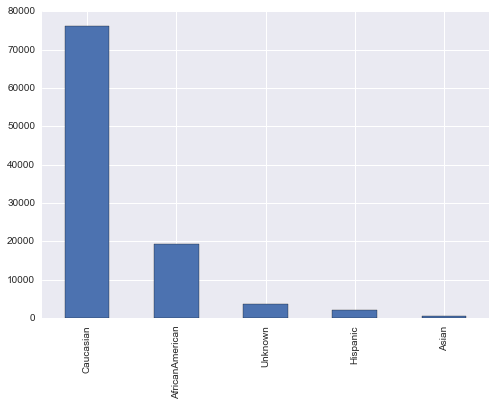

In [37]:
data.race.value_counts().plot(kind = 'bar')

# gender

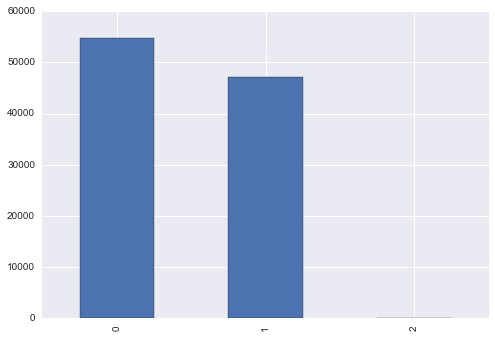

In [38]:
data.gender.value_counts().plot(kind = 'bar')

## age

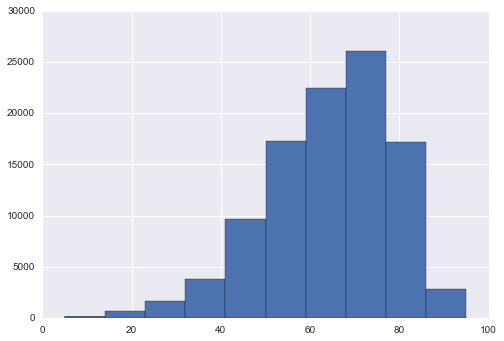

In [41]:
data.age.hist()

## weight

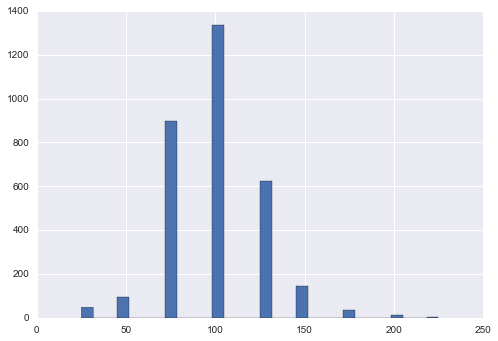

In [46]:
data.weight[data.weight != 0].hist(bins = 30)

## discharged to location

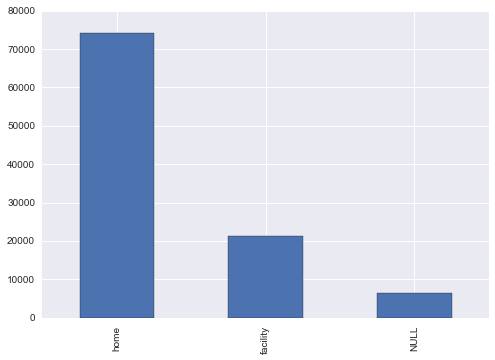

In [60]:
data.discharged_to_location.value_counts().plot(kind = 'bar')

## admission source aggregated

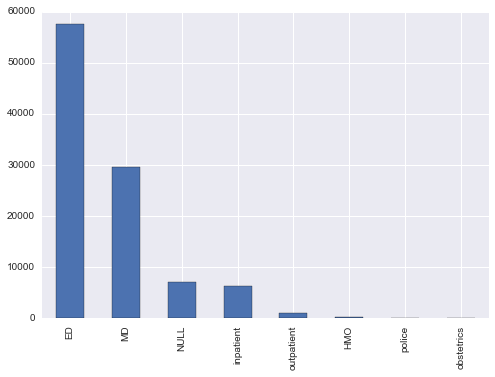

In [63]:
data.admission_source_aggregated.value_counts().plot(kind = 'bar')

## days in hospital

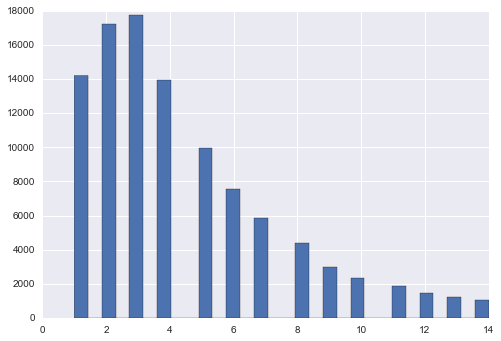

In [66]:
data.days_in_hospital.hist(bins = 30)

## payor code

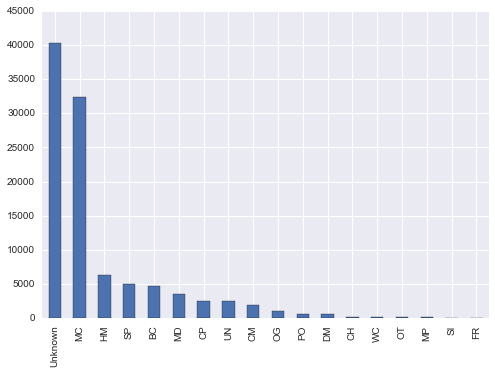

In [71]:
data.payor_code.value_counts().plot(kind = 'bar')

## number of labs

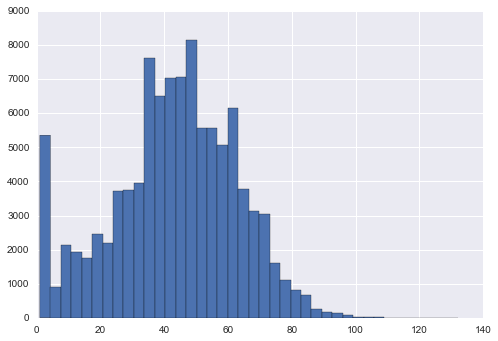

In [81]:
data.number_labs.hist(bins = 40)

## number of procedures

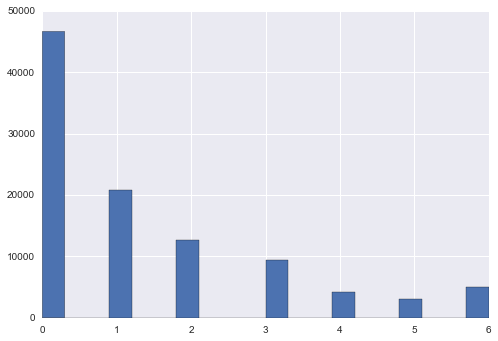

In [94]:
data.number_procedures.hist(bins=20)

## number of meds

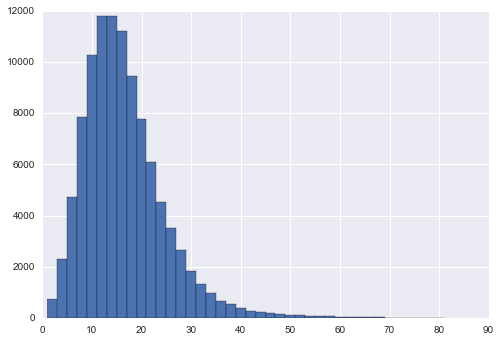

In [97]:
data.number_meds.hist(bins = 40)

## outpatient visits (at a clinic office, not admitted into the hospital)

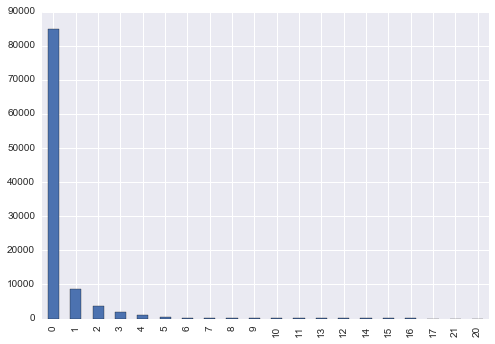

In [105]:
data.number_outpatient.value_counts().head(20).plot(kind = 'bar')

## number of emergency visits (except none)

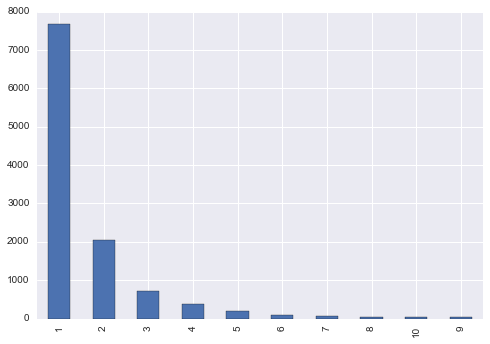

In [108]:
data.number_emergency[data.number_emergency != 0].value_counts().head(10).plot(kind = 'bar')

## number of inpatient stays (hospital admissions)

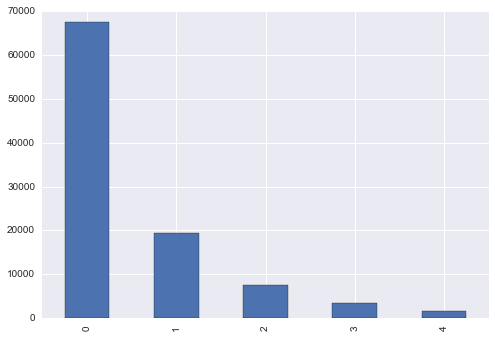

In [111]:
data.number_inpatient.value_counts().head().plot(kind = 'bar')

## total number of diagnoses

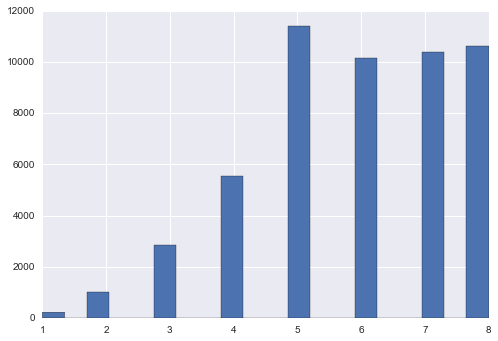

In [134]:
data.total_number_diag[data.total_number_diag < 9].hist(bins = 20)

## max blood glucose level (normal is normally considered between 80 - 120)


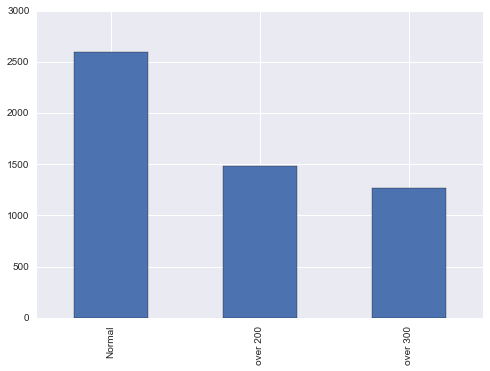

In [139]:
data.max_blood_glucose[data.max_blood_glucose != 'Unknown'].value_counts().plot(kind = 'bar')

## A1c == hemoglobin A1c, which is a way to measure average blood glucose levels over a 3-month period
## For a patient with diabetes, the goal is to maintain below 7

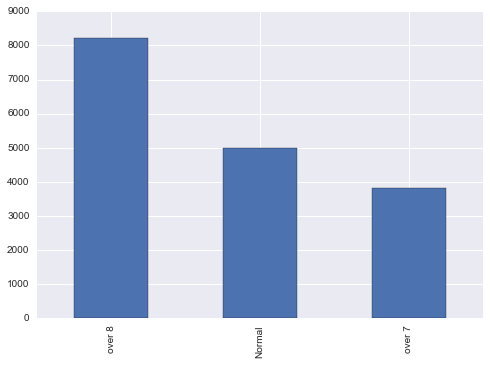

In [143]:
data.a1c[data.a1c != 'Unknown'].value_counts().plot(kind = 'bar')

## on diabetes meds (based on the 23 meds listed)


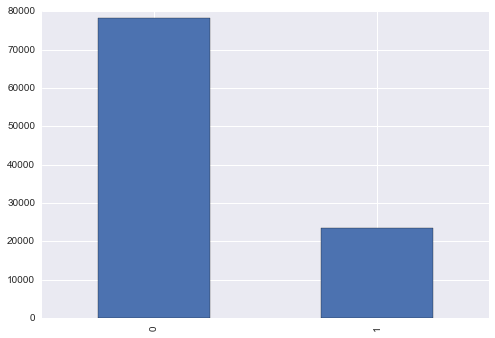

In [152]:
data.on_diabetes_meds.value_counts().plot(kind = 'bar')

## change (in medications)

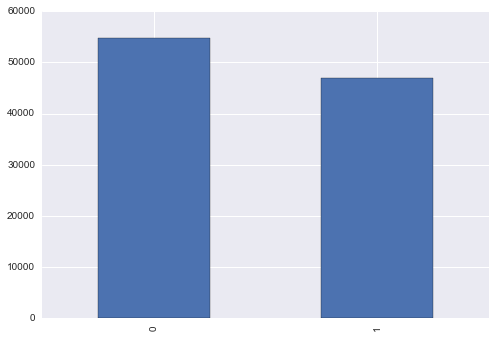

In [147]:
data.change.value_counts().plot(kind = 'bar')